In [1]:
from glob import glob
import os 
import sys
sys.path.append("../")
print(os.getcwd())
print(os.listdir())

import cv2
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

/work/nishika-image-search-work/notebook
['dataset_info.ipynb', 'eda_data_flow.ipynb', 'crop_images.ipynb']


In [2]:
dataset_base_path = Path("/dataset")

In [3]:
def read_img(path: Path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def show_img(path: Path):
    img = read_img(path)
    plt.imshow(img)
    plt.show()

def show_img_pair(path1: Path, 
                  path2: Path):
    plt.subplot(1, 2, 1)
    img = read_img(path1)
    plt.imshow(img)
    plt.title(f"出願: {os.path.basename(path1)}", fontsize=12)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    img = read_img(path2)
    plt.imshow(img)
    plt.title(f"引用: {os.path.basename(path1)}", fontsize=12)
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()

    

In [5]:
train_df = pd.read_csv('/dataset/train.csv')
print(train_df.shape)
display(train_df['category'].value_counts())
train_df.head()

(2311, 5)


3    1133
2     682
4     373
5     123
Name: category, dtype: int64

,gid,path,cite_gid,cite_path,category
0,1000289808,1000289808/1000289808.jpg,1000400231,1000400231/1000400231.jpg,3
1,1000266291,1000266291/1000266291.jpg,1000206509,1000206509/1000206509.jpg,3
2,1000485598,1000485598/1000485598.jpg,1000423794,1000423794/1000423794.jpg,3
3,1000097009,1000097009/1000097009.jpg,1000627155,1000627155/1000627155.jpg,2
4,1000337548,1000337548/1000337548.jpg,1000369541,1000369541/1000369541.jpg,2


In [6]:
BASE_PATH = Path('/dataset') # ご自身の環境のパスを指定ください
train_df['path'] = BASE_PATH / 'crop_train_apply_images' / train_df['path'].values
train_df['cite_path'] = BASE_PATH / "crop_train_cite_images" / train_df["cite_path"].values

print(train_df["path"].iloc[2])
print(train_df["cite_path"].iloc[2])
display(train_df.head())

/dataset/crop_train_apply_images/1000485598/1000485598.jpg
/dataset/crop_train_cite_images/1000423794/1000423794.jpg


,gid,path,cite_gid,cite_path,category
0,1000289808,/dataset/crop_train_apply_images/1000289808/10...,1000400231,/dataset/crop_train_cite_images/1000400231/100...,3
1,1000266291,/dataset/crop_train_apply_images/1000266291/10...,1000206509,/dataset/crop_train_cite_images/1000206509/100...,3
2,1000485598,/dataset/crop_train_apply_images/1000485598/10...,1000423794,/dataset/crop_train_cite_images/1000423794/100...,3
3,1000097009,/dataset/crop_train_apply_images/1000097009/10...,1000627155,/dataset/crop_train_cite_images/1000627155/100...,2
4,1000337548,/dataset/crop_train_apply_images/1000337548/10...,1000369541,/dataset/crop_train_cite_images/1000369541/100...,2


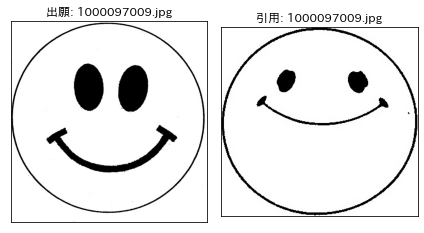

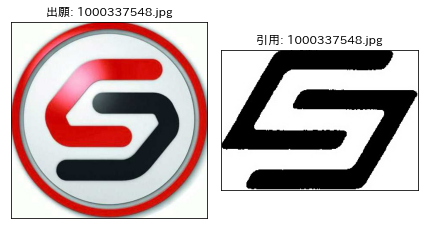

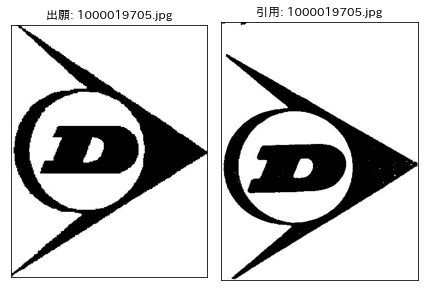

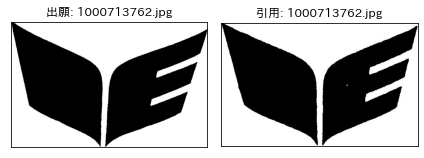

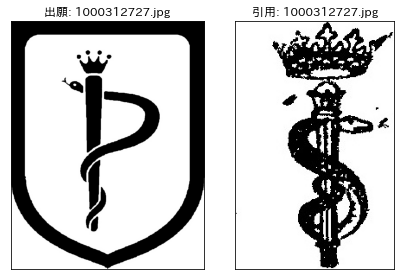

In [7]:
for i in range(5):
    idx = train_df[train_df['category'] == 2].index[i]
    show_img_pair(str(train_df.iloc[idx,1]), str(train_df.iloc[idx,3]))

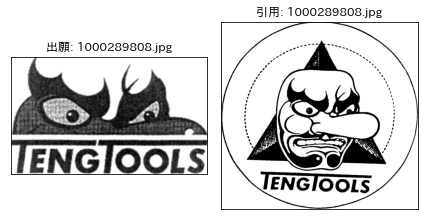

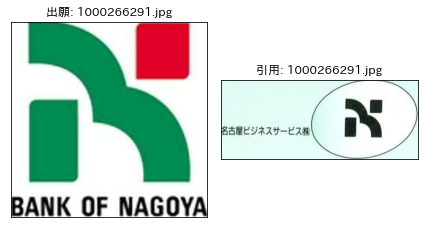

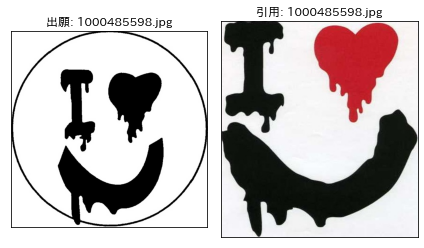

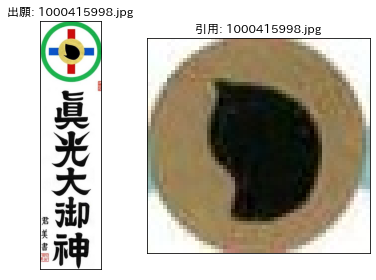

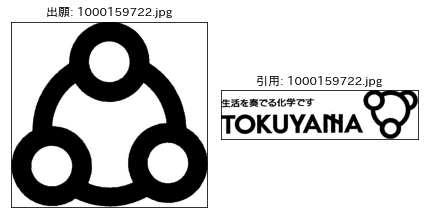

In [8]:
for i in range(5):
    idx = train_df[train_df['category'] == 3].index[i]
    show_img_pair(str(train_df.iloc[idx,1]), str(train_df.iloc[idx,3]))

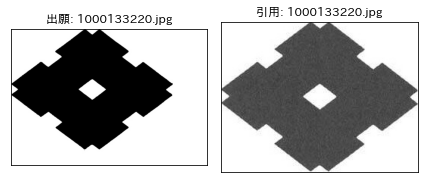

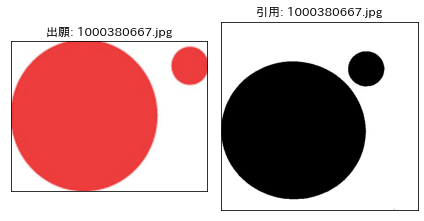

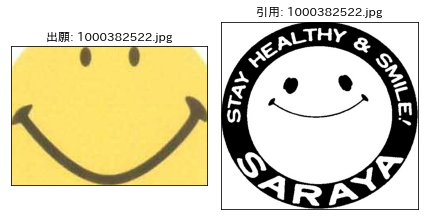

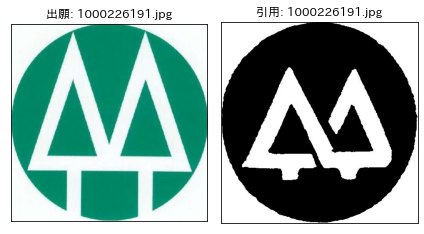

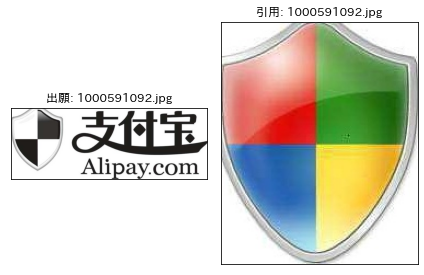

In [10]:
for i in range(5):
    idx = train_df[train_df['category'] == 4].index[i]
    show_img_pair(str(train_df.iloc[idx,1]), str(train_df.iloc[idx,3]))

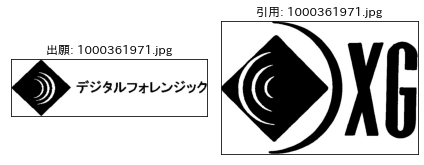

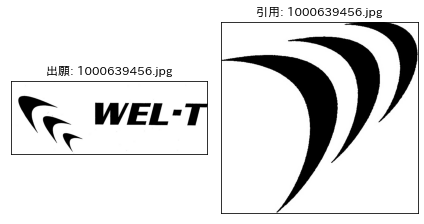

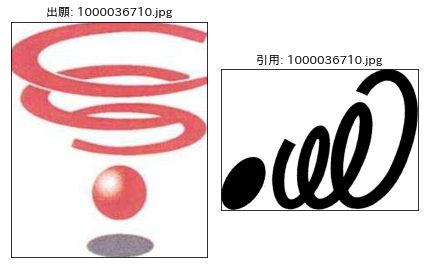

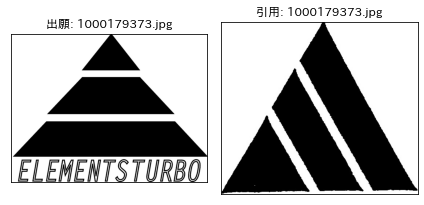

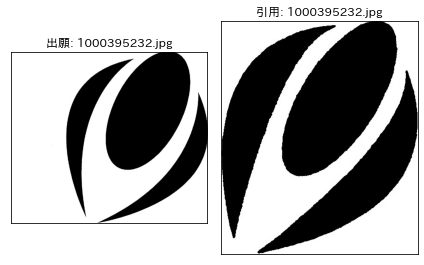

In [11]:
for i in range(5):
    idx = train_df[train_df['category'] == 5].index[i]
    show_img_pair(str(train_df.iloc[idx,1]), str(train_df.iloc[idx,3]))